# Classification Task

## Importing Library 

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [146]:
import os

In [147]:
os.listdir('D:\DATA Science\WEEK 20')

['22-01-2022', '23-01-2022', 'archive.zip', 'diabetes.csv']

# Importing Data

In [148]:
df = pd.read_csv('diabetes.csv')

In [149]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Label encoder 

If there are any categorical value

Ordinal -- Comparible ( high(3),mediam(2),low(1))

LabelEncoder()

## One hot encoding


Nominal --- Non comparible (A ,B and C)

OneHotEncoder()

If we denote it by some number it will be comparible but they are not related.

So, we create the separate columns for them 

Type--->   A   B   C


 C         0   0   1


 A         1   0   0

<AxesSubplot:>

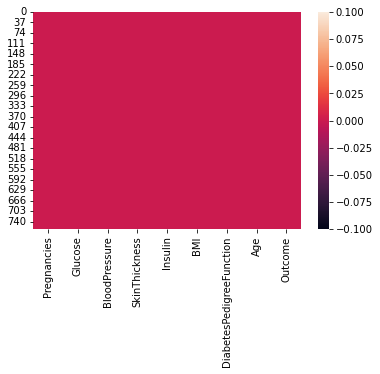

In [151]:
sns.heatmap(df.isnull())

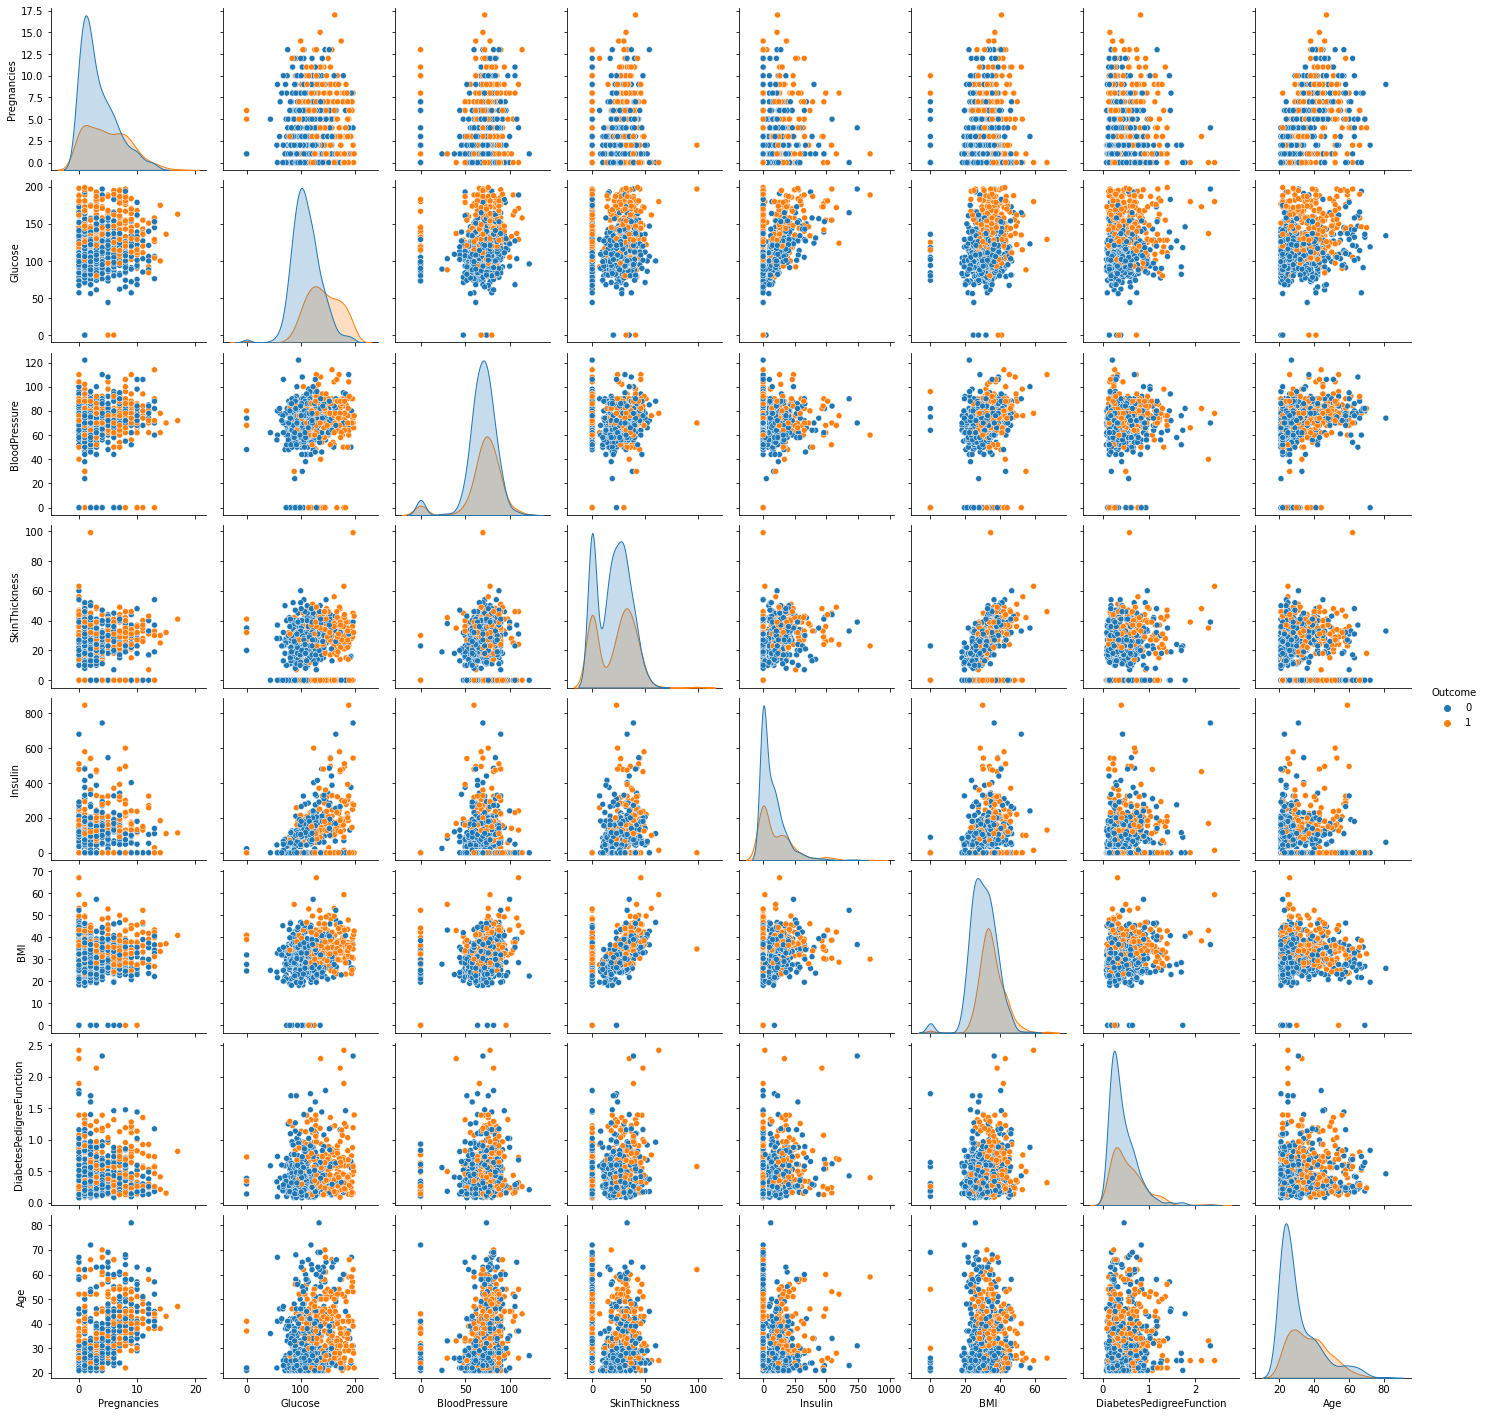

In [152]:
sns.pairplot(df,hue='Outcome')

In [153]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


25% ---> Highest value in top 25% when we sort it out


Standared Deviation ---> High value indicate scaterd data



So try to prefer the data with high standared Deviation 


<AxesSubplot:>

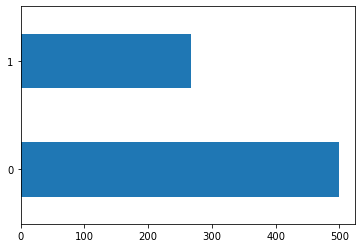

In [154]:
df['Outcome'].value_counts().plot(kind='barh')

## Standardize the Variables

Difference B/W StanderdSclar and MinMaxScalar

MinMaxScalar - Pushes the values B/W some range like (0,10)

Standered Scalar - For any vales it subtract the mean value from it and devided by standered deviation of feature

Like for linear,logical regression and all we will go for Standered scalar insted of Min Max

In [155]:
from sklearn.preprocessing import MinMaxScaler

In [156]:
SC=MinMaxScaler(feature_range=(0,1))

In [157]:
df_deform = SC.fit_transform(df.values)

In [158]:
df_deform

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.23441503, 0.48333333,
        1.        ],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.11656704, 0.16666667,
        0.        ],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.25362938, 0.18333333,
        1.        ],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.07130658, 0.15      ,
        0.        ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.11571307, 0.43333333,
        1.        ],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.10119556, 0.03333333,
        0.        ]])

In [159]:
df_scaled = pd.DataFrame(df_deform,columns=df.columns)

In [160]:
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


In [161]:
from scipy import stats

In [162]:
df_scaled[(np.abs(stats.zscore(df_scaled))<3).all(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


In [163]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


<AxesSubplot:>

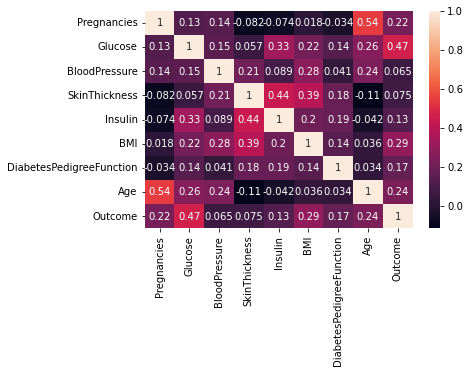

In [164]:
sns.heatmap(df.corr(),annot=True)

## Train and Test Data

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X=df_scaled.drop('Outcome',axis=1)
y=df_scaled['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier

## Training Data & Prediction

In [167]:
from sklearn.ensemble import RandomForestClassifier 

In [168]:
rfc= RandomForestClassifier()

In [169]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [170]:
rfc.feature_importances_

array([0.0753669 , 0.27403806, 0.08372961, 0.07011282, 0.06550362,
       0.16145208, 0.12090554, 0.14889137])

In [171]:
a=df.columns

In [172]:
feature_imp = pd.DataFrame(rfc.feature_importances_,index=a[0:8] )

In [173]:
feature_imp.sort_values(by=0,ascending=False)

,0
Glucose,0.274038
BMI,0.161452
Age,0.148891
DiabetesPedigreeFunction,0.120906
BloodPressure,0.083730
Pregnancies,0.075367
SkinThickness,0.070113
Insulin,0.065504


In [174]:
P1=rfc.predict(X_test)

In [175]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [176]:
print(classification_report(y_test,P1))
print('\n')
print(confusion_matrix(y_test, P1))
print('\n')
print(accuracy_score(y_test, P1))

              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80       151
         1.0       0.63      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



[[122  29]
 [ 31  49]]


0.7402597402597403


## Predictions and Evaluations From Top feature

In [177]:
from sklearn.feature_selection import RFE

In [178]:
M1=RFE(rfc,n_features_to_select=4)

In [179]:
M1.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=4)

In [180]:
prediction=M1.predict(X_test)

In [181]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [182]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80       151
         1.0       0.62      0.69      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



In [183]:
confusion_matrix(y_test, prediction)

array([[118,  33],
       [ 25,  55]], dtype=int64)

In [184]:
accuracy_score(y_test, prediction)

0.7489177489177489

### Next Model Using Feature No different

In [185]:
M2=RFE(rfc,n_features_to_select=5)

In [186]:
M2.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=5)

In [187]:
P2=M2.predict(X_test)

In [188]:
print(classification_report(y_test,P2))
print('\n')
print(confusion_matrix(y_test, P2))
print('\n')
print(accuracy_score(y_test, P2))

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80       151
         1.0       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



[[120  31]
 [ 30  50]]


0.7359307359307359


# Decision Tree

In [189]:
from sklearn.tree import DecisionTreeClassifier

In [190]:
tr = DecisionTreeClassifier()

In [191]:
tr.fit(X_train,y_train)

DecisionTreeClassifier()

In [192]:
Pre1=tr.predict(X_test)

In [193]:
print(classification_report(y_test,Pre1))
print('\n')
print(confusion_matrix(y_test, Pre1))
print('\n')
print(accuracy_score(y_test, Pre1))

              precision    recall  f1-score   support

         0.0       0.83      0.72      0.77       151
         1.0       0.57      0.72      0.64        80

    accuracy                           0.72       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.72      0.72       231



[[108  43]
 [ 22  58]]


0.7186147186147186


In [194]:
M3 = RFE(tr,n_features_to_select=6)

In [195]:
M3.fit(X_train,y_train)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=6)

In [196]:
Pre2=M3.predict(X_test)

In [197]:
print(classification_report(y_test,Pre2))
print('\n')
print(confusion_matrix(y_test, Pre2))
print('\n')
print(accuracy_score(y_test, Pre2))

              precision    recall  f1-score   support

         0.0       0.80      0.71      0.75       151
         1.0       0.55      0.68      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.70       231



[[107  44]
 [ 26  54]]


0.696969696969697


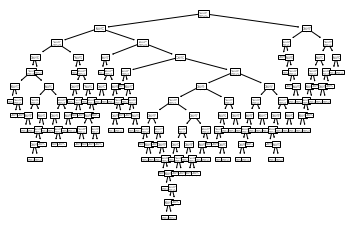

In [198]:
from sklearn import tree

tree.plot_tree(tr)

plt.show()


# SVM

In [199]:
from sklearn.svm import SVC

In [200]:
vm = SVC()

In [201]:
vm.fit(X_train,y_train)

SVC()

In [202]:
P3=vm.predict(X_test)

In [203]:
print(classification_report(y_test,P3))
print('\n')
print(confusion_matrix(y_test, P3))
print('\n')
print(accuracy_score(y_test, P3))

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82       151
         1.0       0.66      0.60      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



[[126  25]
 [ 32  48]]


0.7532467532467533


## Gridsearch

In [204]:
from sklearn.model_selection import GridSearchCV

In [205]:
param_grid = {'C': [0.1,1, 10, 100, 1000,10000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 

In [206]:
gr=GridSearchCV(SVC(),param_grid)

In [207]:
gr.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [208]:
gr.best_estimator_

SVC(C=1000, gamma=0.01)

In [209]:
gr.best_params_

{'C': 1000, 'gamma': 0.01}

In [210]:
P4=gr.predict(X_test)

In [211]:
print(classification_report(y_test,P4))
print('\n')
print(confusion_matrix(y_test, P4))
print('\n')
print(accuracy_score(y_test, P4))

              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81       151
         1.0       0.65      0.62      0.64        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.75      0.75       231



[[124  27]
 [ 30  50]]


0.7532467532467533


# Naive Bayes classifier

In [212]:
from sklearn.naive_bayes import GaussianNB

In [213]:
NB = GaussianNB()

In [214]:
NB.fit(X_train,y_train)

GaussianNB()

In [215]:
P5= NB.predict(X_test)

In [216]:
print(classification_report(y_test,P5))
print('\n')
print(confusion_matrix(y_test, P5))
print('\n')
print(accuracy_score(y_test, P5))

              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80       151
         1.0       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



[[119  32]
 [ 27  53]]


0.7445887445887446


# KNN

In [217]:
from sklearn.neighbors import KNeighborsClassifier

In [218]:
knn = KNeighborsClassifier(n_neighbors=1)

In [219]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [220]:
P6=knn.predict(X_test)

In [221]:
print(classification_report(y_test,P6))
print('\n')
print(confusion_matrix(y_test, P6))
print('\n')
print(accuracy_score(y_test, P6))

              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75       151
         1.0       0.53      0.55      0.54        80

    accuracy                           0.68       231
   macro avg       0.64      0.65      0.64       231
weighted avg       0.68      0.68      0.68       231



[[112  39]
 [ 36  44]]


0.6753246753246753


In [222]:
error_Mat=[]

In [223]:
for i in range (1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_Mat.append(np.mean(predict_i != y_test))

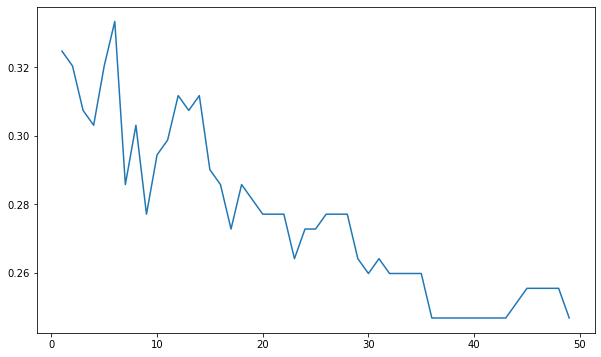

In [224]:
plt.figure(figsize=(10,6))
plt.plot(range (1,50),error_Mat)

In [225]:
knn = KNeighborsClassifier(n_neighbors=30)

In [226]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [227]:
P7=knn.predict(X_test)

In [228]:
print(classification_report(y_test,P7))
print('\n')
print(confusion_matrix(y_test, P7))
print('\n')
print(accuracy_score(y_test, P7))

              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82       151
         1.0       0.69      0.46      0.55        80

    accuracy                           0.74       231
   macro avg       0.72      0.67      0.68       231
weighted avg       0.73      0.74      0.73       231



[[134  17]
 [ 43  37]]


0.7402597402597403


# Logistic Regression

In [229]:
from sklearn.linear_model import LogisticRegression

In [230]:
lr = LogisticRegression()

In [231]:
lr.fit(X_train,y_train)

LogisticRegression()

In [232]:
P8=lr.predict(X_test)

In [233]:
print(classification_report(y_test,P8))
print('\n')
print(confusion_matrix(y_test, P8))
print('\n')
print(accuracy_score(y_test, P8))

              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81       151
         1.0       0.65      0.56      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



[[127  24]
 [ 35  45]]


0.7445887445887446


# GB Boosting

In [234]:
from sklearn.ensemble import GradientBoostingClassifier

In [235]:
gr = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

In [236]:
gr.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1)

In [237]:
P9=gr.predict(X_test)

In [238]:
print(classification_report(y_test,P9))
print('\n')
print(confusion_matrix(y_test, P9))
print('\n')
print(accuracy_score(y_test, P9))

              precision    recall  f1-score   support

         0.0       0.80      0.77      0.78       151
         1.0       0.59      0.64      0.61        80

    accuracy                           0.72       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.72      0.73       231



[[116  35]
 [ 29  51]]


0.7229437229437229


# Histogram Boosting Classifier

In [239]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import KFold , cross_val_score

In [240]:
hsb = HistGradientBoostingClassifier()

In [241]:
kfold= KFold(n_splits=5, shuffle=False, random_state=None)
scores= cross_val_score(hsb, X_train, y_train, cv=kfold)

In [242]:
print(scores)

[0.84259259 0.75925926 0.75700935 0.72897196 0.70093458]


# XGB Boosting

In [243]:
!pip install xgboost

In [244]:
from xgboost import XGBClassifier

In [245]:
xgb=XGBClassifier()

In [246]:
from sklearn.model_selection import KFold , cross_val_score

In [247]:
kfold= KFold(n_splits=5, shuffle=False, random_state=None)
scores= cross_val_score(xgb, X_train, y_train, cv=kfold)

C:\Users\SUDU\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SUDU\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SUDU\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SUDU\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SUDU\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [248]:
print(scores)

[0.83333333 0.71296296 0.72897196 0.71962617 0.71962617]


# Light GBM

In [249]:
!pip install lightgbm

In [250]:
from lightgbm import LGBMClassifier

In [251]:
lgb=LGBMClassifier()

In [252]:
kfold= KFold(n_splits=5, shuffle=False, random_state=None)
scores= cross_val_score(lgb, X_train, y_train, cv=kfold)

In [253]:
print(scores)

[0.7962963  0.74074074 0.73831776 0.71028037 0.74766355]


# CAT Boosting

In [254]:
!pip install catboost

In [255]:
from catboost import CatBoostClassifier

In [256]:
cat= CatBoostClassifier()

In [257]:
kfold= KFold(n_splits=10, shuffle=False, random_state=None)
scores= cross_val_score(cat, X_train, y_train, cv=kfold,verbose=0)

Learning rate set to 0.007551
0:	learn: 0.6890244	total: 12ms	remaining: 12s
1:	learn: 0.6857379	total: 22ms	remaining: 11s
2:	learn: 0.6819966	total: 28.4ms	remaining: 9.44s
3:	learn: 0.6783027	total: 32.9ms	remaining: 8.19s
4:	learn: 0.6749944	total: 37ms	remaining: 7.36s
5:	learn: 0.6709235	total: 42.2ms	remaining: 6.99s
6:	learn: 0.6670466	total: 46.9ms	remaining: 6.65s
7:	learn: 0.6633405	total: 50.9ms	remaining: 6.31s
8:	learn: 0.6596365	total: 53.9ms	remaining: 5.93s
9:	learn: 0.6566278	total: 57ms	remaining: 5.64s
10:	learn: 0.6530103	total: 59.8ms	remaining: 5.37s
11:	learn: 0.6499584	total: 62.5ms	remaining: 5.14s
12:	learn: 0.6462144	total: 65.2ms	remaining: 4.95s
13:	learn: 0.6422295	total: 68ms	remaining: 4.79s
14:	learn: 0.6389502	total: 71.6ms	remaining: 4.7s
15:	learn: 0.6360411	total: 74.2ms	remaining: 4.57s
16:	learn: 0.6329225	total: 76.9ms	remaining: 4.44s
17:	learn: 0.6296770	total: 79.7ms	remaining: 4.35s
18:	learn: 0.6262660	total: 82.5ms	remaining: 4.26s
19:	lea

In [258]:
print(scores)

[0.88888889 0.75925926 0.75925926 0.72222222 0.75925926 0.83333333
 0.7037037  0.73584906 0.75471698 0.73584906]


# ALL AT ONE PLACE

In [259]:
Name=['Random Forest Classifier','Decision Tree','SVM', 'Naive Bayes classifier', 'KNN', 'Logistic Regression', 
      'GBBoosting','Histogram Boosting Classifier','XGB Boosting','Light GBM','CAT Boosting']
clfs= [RandomForestClassifier(),DecisionTreeClassifier(),SVC(),GaussianNB(),KNeighborsClassifier(n_neighbors=40),
       LogisticRegression(),GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1),
       HistGradientBoostingClassifier(),XGBClassifier(),LGBMClassifier(),CatBoostClassifier()]


In [260]:
results=[]
for i in clfs:
    i.fit(X_train,y_train)
    acc=accuracy_score(y_test, i.predict(X_test))
    results.append(acc)

score= pd.DataFrame(results,index=Name)
score.columns=['Accuracy']
score.sort_values(by='Accuracy',ascending=False)

C:\Users\SUDU\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.0079
0:	learn: 0.6879744	total: 3.65ms	remaining: 3.65s
1:	learn: 0.6843414	total: 7.12ms	remaining: 3.55s
2:	learn: 0.6805760	total: 10.8ms	remaining: 3.58s
3:	learn: 0.6765782	total: 13.9ms	remaining: 3.46s
4:	learn: 0.6720829	total: 17ms	remaining: 3.38s
5:	learn: 0.6681617	total: 19.9ms	remaining: 3.3s
6:	learn: 0.6641912	total: 23.1ms	remaining: 3.27s
7:	learn: 0.6602881	total: 26.4ms	remaining: 3.27s
8:	learn: 0.6562626	total: 29.4ms	remaining: 3.24s
9:	learn: 0.6528483	total: 32.4ms	remaining: 3.21s
10:	learn: 0.6487823	total: 35.5ms	remaining: 3.19s
11:	learn: 0.6454980	total: 38.6ms	remaining: 3.18s
12:	learn: 0.6418953	total: 41.8ms	remaining: 3.17s

,Accuracy
SVM,0.753247
KNN,0.753247
Naive Bayes classifier,0.744589
Logistic Regression,0.744589
Random Forest Classifier,0.740260
CAT Boosting,0.740260
Histogram Boosting Classifier,0.735931
XGB Boosting,0.735931
Light GBM,0.735931
GBBoosting,0.722944


In [266]:
score.sort_values(by='Accuracy',ascending=False)

,Accuracy
CAT Boosting,0.772707
Random Forest Classifier,0.768986
SVM,0.763413
Logistic Regression,0.757823
Histogram Boosting Classifier,0.757754
KNN,0.750450
Naive Bayes classifier,0.750433
GBBoosting,0.746660
Light GBM,0.746660
XGB Boosting,0.742904


In [261]:
from sklearn.model_selection import KFold , cross_val_score

In [262]:
kfold= KFold(n_splits=5, shuffle=False, random_state=None)

In [263]:
scores= cross_val_score(gr, X_train, y_train, cv=kfold)
print(scores)

[0.80555556 0.73148148 0.77570093 0.72897196 0.69158879]


In [264]:
scores= cross_val_score(rfc, X_train, y_train, cv=kfold)
print(scores)

[0.80555556 0.76851852 0.77570093 0.71962617 0.77570093]


In [265]:
results_mean=[]
for i in clfs:
    cvs= cross_val_score(i, X_train, y_train, cv=kfold)
    results_mean.append(cvs.mean())

score= pd.DataFrame(results_mean,index=Name)
score.columns=['Accuracy']
score.sort_values(by='Accuracy',ascending=False)

C:\Users\SUDU\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SUDU\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SUDU\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SUDU\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SUDU\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.007178
0:	learn: 0.6886525	total: 3.45ms	remaining: 3.44s
1:	learn: 0.6853192	total: 6.37ms	remaining: 3.18s
2:	learn: 0.6816225	total: 9.18ms	remaining: 3.05s
3:	learn: 0.6780300	total: 12.2ms	remaining: 3.04s
4:	learn: 0.6742639	total: 15.5ms	remaining: 3.09s
5:	learn: 0.6707236	total: 18.7ms	remaining: 3.09s
6:	learn: 0.6672192	total: 21.8ms	remaining: 3.1s
7:	learn: 0.6643449	total: 25.9ms	remaining: 3.21s
8:	learn: 0.6609980	total: 29.4ms	remaining: 3.23s
9:	learn: 0.6572428	total: 32.2ms	remaining: 3.19s
10:	learn: 0.6539626	total: 34.8ms	remaining: 3.13s
11:	learn: 0.6513592	total: 37.9ms	remaining: 3.12s
12:	learn: 0.6478975	total: 40.4ms	remaining: 3

,Accuracy
CAT Boosting,0.772707
Random Forest Classifier,0.768986
SVM,0.763413
Logistic Regression,0.757823
Histogram Boosting Classifier,0.757754
KNN,0.750450
Naive Bayes classifier,0.750433
GBBoosting,0.746660
Light GBM,0.746660
XGB Boosting,0.742904


In [267]:
score.sort_values(by='Accuracy',ascending=False)

,Accuracy
CAT Boosting,0.772707
Random Forest Classifier,0.768986
SVM,0.763413
Logistic Regression,0.757823
Histogram Boosting Classifier,0.757754
KNN,0.750450
Naive Bayes classifier,0.750433
GBBoosting,0.746660
Light GBM,0.746660
XGB Boosting,0.742904
